# Modeling

<h3> Prepare data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from scipy.stats import skew
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
train = pd.read_csv('./expedia_data/train.csv')
test = pd.read_csv('./expedia_data/test.csv')

print('training data has %d records'%len(train))
print('test data has %d records'%len(test))

NameError: name 'pd' is not defined

In [4]:
cols_train_only = [col for col in train.columns.unique().tolist() if col not in test.columns.unique().tolist()]
print('Columns only available in training data:',cols_train_only)

train = train.drop(columns = cols_train_only)
train.head()

Columns only available in training data: ['position', 'click_bool', 'gross_bookings_usd', 'booking_bool']


In [8]:
# combine train and test data
all_data = pd.concat([train, test], ignore_index=True)
print(all_data.head())
print('Whole dataset has %d records' % len(all_data))

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [10]:
all_data['date_time'] = pd.to_datetime(all_data.date_time)
all_data.sort_values(by=['date_time'],inplace=True)
all_data = all_data.reset_index(drop=True)
all_data.head()

In [12]:
# handle NA values
NA_columns = []
for col in all_data.columns.unique().tolist():
    if all_data[col].isna().values.any() == True:
        NA_columns.append(col)

NA_columns

['visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'prop_review_score',
 'prop_location_score2',
 'srch_query_affinity_score',
 'orig_destination_distance',
 'comp1_rate',
 'comp1_inv',
 'comp1_rate_percent_diff',
 'comp2_rate',
 'comp2_inv',
 'comp2_rate_percent_diff',
 'comp3_rate',
 'comp3_inv',
 'comp3_rate_percent_diff',
 'comp4_rate',
 'comp4_inv',
 'comp4_rate_percent_diff',
 'comp5_rate',
 'comp5_inv',
 'comp5_rate_percent_diff',
 'comp6_rate',
 'comp6_inv',
 'comp6_rate_percent_diff',
 'comp7_rate',
 'comp7_inv',
 'comp7_rate_percent_diff',
 'comp8_rate',
 'comp8_inv',
 'comp8_rate_percent_diff']

In [14]:
def create_binary_feat(df, col):
    '''
    input: dataframe
    output: a dataframe with a new binary column based on old column
    if value in old col is not NA, then set 1; otherwise, set 0

    '''
    new_col = 'new_'+ col
    df[new_col] = df[col].apply(lambda x: 1 if x >= 0 else 0)

for col in NA_columns:
    create_binary_feat(all_data, col)

In [15]:
# output to csv file 
'''
good is that no need to run the above codes each time;
TODO: remember to handle NA values later, 
since currently it's too computational expensive to run

'''
all_data.to_csv('all_data_clean.csv',index = False, encoding = 'utf-8')

KeyboardInterrupt: 

<h4> ---- 以上可以run出来 ----

<h5>待run:

In [ ]:
# TODO：replace old column NA values to median value
all_data_non_NA = all_data.fillna(all_data.median())
all_data_non_NA.head()

<h4> Sample data into smaller size (10000)

In [4]:
all_data = pd.read_csv('./all_data_fixed.csv')

In [5]:
# all_data['date_time'] = pd.to_datetime(all_data.date_time)
# all_data.sort_values(by=['date_time'],inplace=True)
# all_data = all_data.reset_index(drop=True)
# all_data.head()

In [6]:
# all_data.to_csv('all_data_fixed.csv', index = False)

In [10]:
def get_sampled_data(size, data):
    '''
    This function takes in the whole dataset, 
    and outout a sampled subset with data size specified
    '''
    interval_range = len(data)//size
    mid_idx_lst = []
    for i in range(1,size+1):
        mid_idx = (interval_range*(i-1) + interval_range*i)//2
        mid_idx_lst.append(mid_idx)

    print(mid_idx_lst[0],mid_idx_lst[-1])
    data_sampled = data.iloc[mid_idx_lst]
    return data_sampled
    
all_data_sampled = get_sampled_data(10000, all_data)

45 899955


In [11]:
# replace old column NA values to median value
all_data_sampled_non_NA = all_data_sampled.fillna(all_data_sampled.median())
print(all_data_sampled_non_NA.head())

# check NA values
all_data_sampled_non_NA.isna().sum()

     srch_id            date_time  site_id  visitor_location_country_id  \
45     21951  2012-11-01 00:03:24       24                          216   
135    81578  2012-11-01 00:08:29        5                          219   
225   383846  2012-11-01 00:10:31        5                          100   
315   355773  2012-11-01 00:13:03        5                           23   
405   625417  2012-11-01 00:21:36        5                          219   

     visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
45                      3.29               139.985               31     9230   
135                     3.29               139.985              219    20587   
225                     3.29               139.985               98    36763   
315                     3.29               139.985               32    77298   
405                     2.73                92.300              219     7919   

     prop_starrating  prop_review_score  ...  new_comp5_rate_percent

srch_id                          0
date_time                        0
site_id                          0
visitor_location_country_id      0
visitor_hist_starrating          0
visitor_hist_adr_usd             0
prop_country_id                  0
prop_id                          0
prop_starrating                  0
prop_review_score                0
prop_brand_bool                  0
prop_location_score1             0
prop_location_score2             0
prop_log_historical_price        0
price_usd                        0
promotion_flag                   0
srch_destination_id              0
srch_length_of_stay              0
srch_booking_window              0
srch_adults_count                0
srch_children_count              0
srch_room_count                  0
srch_saturday_night_bool         0
srch_query_affinity_score        0
orig_destination_distance        0
random_bool                      0
comp1_rate                       0
comp1_inv                        0
comp1_rate_percent_d

Notice: 以上，data preprocessing基本完成。但是是基于sampled size (总共50000条)，因此在Flux set up 好之后，再用所有dataset的数据来run一遍。

<h3> Split data into training, validation and test set

In [12]:
def split_data(data):
    '''
    This function takes in the whole data set and divide it into training, validation and test data;
    split into 0.8 and 0.2 first; second split using the same ratio into training and valiation
    '''
    training_size_large = int(len(data) * 0.8)   
    validation_size = int(training_size_large * 0.2)
    training_size = training_size_large - validation_size
    test_size = int(len(data) * 0.2)
    
    print('training size: %d'%training_size)
    print('validation size: %d'%validation_size)
    print('test size: %d'%test_size)
    
    # split data manually
    training_data = data[0: training_size]
    validation_data = data[training_size:(training_size + validation_size)]
    test_data = data[(training_size + validation_size): (training_size + validation_size + test_size)]
    
    return training_data, validation_data, test_data
    
training_data, validation_data, test_data = split_data(all_data_sampled_non_NA)

training size: 6400
validation size: 1600
test size: 2000


<h3> (Ongoing) Resample data | into weeks or days:

there are 217 days in total.
there are 32 weeks in total.


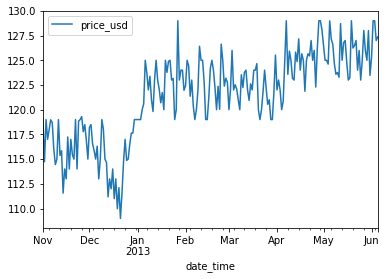

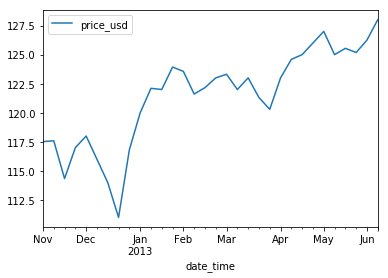

In [25]:
def resample_data(data,sample_method = 'W'):
    data_resetIndex = data.set_index('date_time')
    resampled_data = data_resetIndex.resample(sample_method).median()
    resampled_data[['price_usd']].plot()
    return resampled_data

daily = resample_data(all_data, sample_method = 'D') #split dataset by day
print('there are %d days in total.'%len(daily))
# TODO: 将numeric, categorical feats区分开来

weekly = resample_data(all_data, sample_method = 'W') #split the whole dataset by weeks
print('there are %d weeks in total.'%len(weekly))
# TODO: need to exclude boolean values and categorical values

# Modeling (regression + linear methods)

numeric features:  prop_starrating, prop_review_score, prop_location_score1, prop_log_historical_price, srch_adults_count, srch_room_count, orig_destination_distance 
categorical features: 'srch_saturday_night_bool','promotion_flag','prop_brand_bool','site_id','visitor_location_country_id','prop_country_id','srch_destination_id'

In [26]:
def get_RMSE(y_pred,y_true,data):
    '''
    This function takes in the prediction values and the true values,
    and the whole data set, and output an rmse score.
    '''
    return np.sqrt(sum((y_pred - y_true)**2)/len(data))

<h3> 1.Linear regression (numeric feats):

*可以考虑normalization, standardization以及log transform data

In [28]:
def get_X_y(data,features):
    '''
    This function takes in the data set, and the features needed for regression model;
    and return X, y accordingly.
    '''
    X = data[features]
    y = data['price_usd']
    return X,y

imp_numeric_feats = ['prop_starrating', 'prop_review_score', 'prop_location_score1', 'prop_log_historical_price', 'srch_adults_count', 'srch_room_count', 'orig_destination_distance']
X_train, y_train = get_X_y(training_data,imp_numeric_feats)
X_validation, y_validation = get_X_y(validation_data,imp_numeric_feats)

In [76]:
# imp_numeric_feats = ['prop_starrating', 'prop_review_score', 'prop_location_score1', 'prop_log_historical_price', 'srch_adults_count', 'srch_room_count', 'orig_destination_distance']

# X_train = training_data[imp_numeric_feats]
# y_train = training_data['price_usd']

# X_validation = validation_data[imp_numeric_feats]
# y_validation = validation_data['price_usd']

In [30]:
def get_modeling_result(model,training_data, validation_data):
    '''
    This function takes in the training set and validation set, and the model you choose;
    output the test RMSE and train RMSE score for evaluation.
    '''
    reg = model.fit(X_train,y_train)
    y_pred_val = reg.predict(X_validation)
    y_pred_train = reg.predict(X_train)
    
    test_RMSE = get_RMSE(y_pred_val,y_validation, validation_data)
    train_RMSE = get_RMSE(y_pred_train ,y_train, training_data)
    
    print('training RMSE:',train_RMSE)
    print('test RMSE:',test_RMSE)
    return train_RMSE, test_RMSE
    
train_RMSE, test_RMSE = get_modeling_result(LinearRegression(),training_data, validation_data)

training RMSE: 2088.102271519992
test RMSE: 146.9639279062244


* RMSE here depends on the size of data => may not have good interpretation for now (but can be used as comparison)

只使用numeric features去做linear regression, 得到training error: 4809.81, test error: 2720.88

In [79]:
# TODO: plot learning curve => 是为了for hyper-param tuning => 暂时先不管
# reference: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
# 可以结合timeseries的cross validation

<h3> 2.Linear regression (categorical feats):

In [ ]:
# all_data.columns.unique().tolist()

In [31]:
# 需要找到important feats再增加了feats之后 => chi-2 test
cat_feats = ['random_bool','srch_saturday_night_bool', 'promotion_flag', 'prop_brand_bool', 'site_id', 'visitor_location_country_id', 'prop_country_id',
 'srch_destination_id', 'srch_id', 'prop_id',]

# get newly created binary columns
new_cat_feats = [col for col in training_data if col.startswith('new')]

# get comp feats
comp_feats = ['comp1_inv','comp2_inv','comp3_inv','comp4_inv','comp5_inv','comp6_inv','comp7_inv','comp8_inv']

cat_feats += new_cat_feats
cat_feats += comp_feats

print(cat_feats)

['random_bool', 'srch_saturday_night_bool', 'promotion_flag', 'prop_brand_bool', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'srch_destination_id', 'srch_id', 'prop_id', 'new_visitor_hist_starrating', 'new_visitor_hist_adr_usd', 'new_prop_review_score', 'new_prop_location_score2', 'new_srch_query_affinity_score', 'new_orig_destination_distance', 'new_comp1_rate', 'new_comp1_inv', 'new_comp1_rate_percent_diff', 'new_comp2_rate', 'new_comp2_inv', 'new_comp2_rate_percent_diff', 'new_comp3_rate', 'new_comp3_inv', 'new_comp3_rate_percent_diff', 'new_comp4_rate', 'new_comp4_inv', 'new_comp4_rate_percent_diff', 'new_comp5_rate', 'new_comp5_inv', 'new_comp5_rate_percent_diff', 'new_comp6_rate', 'new_comp6_inv', 'new_comp6_rate_percent_diff', 'new_comp7_rate', 'new_comp7_inv', 'new_comp7_rate_percent_diff', 'new_comp8_rate', 'new_comp8_inv', 'new_comp8_rate_percent_diff', 'comp1_inv', 'comp2_inv', 'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv']


In [33]:
def get_feats_independence_(df,col1,col2):
    ct = pd.crosstab(df[col1],df[col2]) 
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    return p,chi2

df = training_data
p_dct = {}
chi2_dct = {}
for col in cat_feats:
    p,chi2 = get_feats_independence_(df,col,'price_usd')
    
    p_dct[col] = p
    chi2_dct[col] = chi2
#     print('p_value for variable {} is {}.'.format(col,p))
#     print('chi2 score for variable {} is {}'.format(col,chi2))

# print(p_dct)
# print(chi2_dct)

# sort the categorical variables based on p-value
print('sorted in descending by p-value:',sorted(p_dct.keys(),key=lambda x:p_dct[x], reverse = True))

# sort the categorical variables based on chi2
print('sorted in descending by chi2 score:', sorted(chi2_dct.keys(),key=lambda x:chi2_dct[x]))

sorted in descending by p-value: ['srch_destination_id', 'new_prop_review_score', 'new_srch_query_affinity_score', 'new_comp8_rate_percent_diff', 'comp3_inv', 'comp8_inv', 'comp2_inv', 'new_comp3_rate_percent_diff', 'new_comp3_rate', 'new_comp2_rate_percent_diff', 'new_comp8_rate', 'new_comp3_inv', 'new_prop_location_score2', 'new_comp2_rate', 'new_comp5_rate_percent_diff', 'new_comp2_inv', 'new_comp8_inv', 'srch_saturday_night_bool', 'srch_id', 'new_comp5_inv', 'new_comp5_rate', 'random_bool', 'comp5_inv', 'comp6_inv', 'new_visitor_hist_starrating', 'new_visitor_hist_adr_usd', 'promotion_flag', 'prop_brand_bool', 'new_orig_destination_distance', 'prop_id', 'new_comp4_inv', 'new_comp4_rate', 'new_comp4_rate_percent_diff', 'comp4_inv', 'new_comp7_rate_percent_diff', 'new_comp7_rate', 'new_comp7_inv', 'new_comp6_rate_percent_diff', 'new_comp1_rate', 'new_comp1_inv', 'new_comp1_rate_percent_diff', 'new_comp6_rate', 'new_comp6_inv', 'comp1_inv', 'comp7_inv', 'site_id', 'visitor_location_co

In [34]:
imp_cat_feats = [feat for feat in p_dct.keys() if p_dct[feat] < 0.05]
non_imp_cat_feats = [feat for feat in p_dct.keys() if feat not in imp_cat_feats]

print('important features:',imp_cat_feats)
print('non-important features:',non_imp_cat_feats)

important features: ['random_bool', 'promotion_flag', 'prop_brand_bool', 'site_id', 'visitor_location_country_id', 'prop_country_id', 'prop_id', 'new_visitor_hist_starrating', 'new_visitor_hist_adr_usd', 'new_orig_destination_distance', 'new_comp1_rate', 'new_comp1_inv', 'new_comp1_rate_percent_diff', 'new_comp4_rate', 'new_comp4_inv', 'new_comp4_rate_percent_diff', 'new_comp5_rate', 'new_comp6_rate', 'new_comp6_inv', 'new_comp6_rate_percent_diff', 'new_comp7_rate', 'new_comp7_inv', 'new_comp7_rate_percent_diff', 'comp1_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv']
non-important features: ['srch_saturday_night_bool', 'srch_destination_id', 'srch_id', 'new_prop_review_score', 'new_prop_location_score2', 'new_srch_query_affinity_score', 'new_comp2_rate', 'new_comp2_inv', 'new_comp2_rate_percent_diff', 'new_comp3_rate', 'new_comp3_inv', 'new_comp3_rate_percent_diff', 'new_comp5_inv', 'new_comp5_rate_percent_diff', 'new_comp8_rate', 'new_comp8_inv', 'new_comp8_rate_percent_diff

Text(0.5, 0, 'p-value')

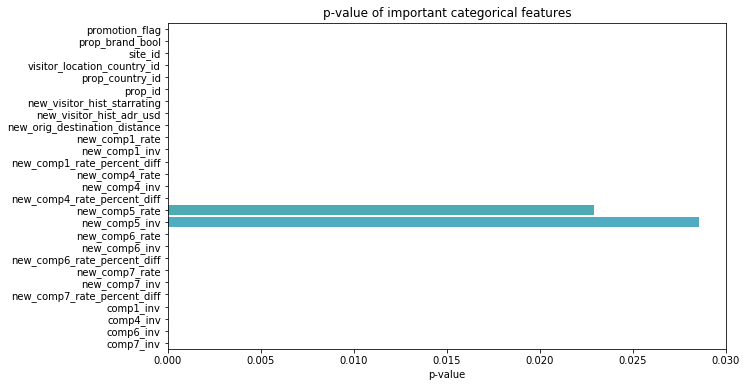

In [88]:
# plot ranking categorical feature importance
f = plt.figure(figsize=(10,6))
ax = sns.barplot(y=imp_cat_feats,x=[p_dct[feat] for feat in imp_cat_feats])
ax.set_title('p-value of important categorical features')
ax.set_xlabel('p-value')

Text(0.5, 0, 'chi2 score')

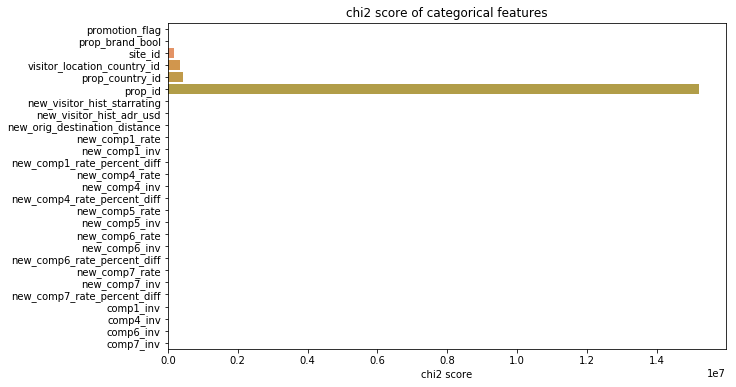

In [87]:
# get chi2 score for those important categorical feats
f = plt.figure(figsize=(10,6))
chi2_imp_cat_values = [chi2_dct[feat] for feat in imp_cat_feats]
ax = sns.barplot(y=imp_cat_feats,x=chi2_imp_cat_values)
ax.set_title('chi2 score of categorical features')
ax.set_xlabel('chi2 score')

<h4> Build linear regression for categorical variables:

In [35]:
X_train, y_train = get_X_y(training_data,imp_cat_feats)
X_validation, y_validation = get_X_y(validation_data,imp_cat_feats)

train_RMSE, test_RMSE = get_modeling_result(LinearRegression(),training_data, validation_data)

training RMSE: 2089.027467560985
test RMSE: 141.3624104523119


只使用categorical features去做linear regression, 得到training error: 4802.44, test error: 2738.13 <br>
为什么只用categorical feats去做prediction, error比只用numeric feats去做的还小.... <br>
如何比较training error, test error的结果？ <br>


注意：
- 'comp1_inv'可以算categorical也可以算numeric variables?
- 删去：random_bool

In [ ]:
# TODO：plot learning curve

<h3> 4.PCA on numeric features:

In [40]:
# get all numeric features
all_numeric_feats = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_location_score1','prop_location_score2',\
                     'prop_log_historical_price','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_query_affinity_score',\
                     'orig_destination_distance','comp1_rate','comp1_rate_percent_diff','comp2_rate','comp2_rate_percent_diff','comp3_rate','comp3_rate_percent_diff','comp4_rate',\
                     'comp4_rate_percent_diff','comp5_rate','comp5_rate_percent_diff','comp6_rate','comp6_rate_percent_diff','comp7_rate','comp7_rate_percent_diff','comp8_rate',\
                     'comp8_rate_percent_diff']

X_train, y_train = get_X_y(training_data, all_numeric_feats)
X_validation, y_validation = get_X_y(validation_data, all_numeric_feats)

In [36]:
# # get all numeric features
# all_numeric_feats = ['visitor_hist_starrating','visitor_hist_adr_usd','prop_starrating','prop_review_score','prop_location_score1','prop_location_score2',\
#                      'prop_log_historical_price','srch_length_of_stay','srch_booking_window','srch_adults_count','srch_children_count','srch_room_count','srch_query_affinity_score',\
#                      'orig_destination_distance','comp1_rate','comp1_rate_percent_diff','comp2_rate','comp2_rate_percent_diff','comp3_rate','comp3_rate_percent_diff','comp4_rate',\
#                      'comp4_rate_percent_diff','comp5_rate','comp5_rate_percent_diff','comp6_rate','comp6_rate_percent_diff','comp7_rate','comp7_rate_percent_diff','comp8_rate',\
#                      'comp8_rate_percent_diff']

# X_train = training_data[all_numeric_feats]
# y_train = training_data['price_usd']

# X_validation = validation_data[all_numeric_feats]
# y_validation = validation_data['price_usd']

/Users/yuanlii/Desktop/SI699_hotel_price_prediction/venv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/yuanlii/Desktop/SI699_hotel_price_prediction/venv/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/yuanlii/Desktop/SI699_hotel_price_prediction/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


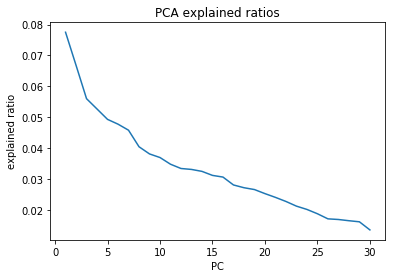

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def get_PCA_result(X_train, X_validation, features):
    '''
    This function takes in X_train, X_validation, the features selected for modeling.
    Output is the explained ratio ranked in decending order, and the plot.
    '''
    # standardization when using PCA
    sc = StandardScaler()  
    X_train_standardized = sc.fit_transform(X_train)  
    X_validation_standardized = sc.transform(X_validation) 
    
    pca = PCA(n_components=len(features))   # PC number equal to feature number
    pca.fit(X_train_standardized)

    ax = sns.lineplot(list(range(1,len(pca.explained_variance_ratio_)+1)),list(pca.explained_variance_ratio_) )
    ax.set_title('PCA explained ratios')
    ax.set_xlabel('PC')
    ax.set_ylabel('explained ratio')

get_PCA_result(X_train, X_validation, all_numeric_feats)    

<h4> what if using only those important features?

*need to rewrite code chuncks into function

In [48]:
X_train, y_train = get_X_y(training_data,imp_numeric_feats)
X_validation, y_validation = get_X_y(validation_data,imp_numeric_feats)
get_PCA_result(X_train, X_validation, imp_numeric_feats)

NameError: name 'get_X_y' is not defined

<h3> 5. TODO: Linear SVM for prediction

can tune param C to compare different performance

* TODO: still need a lot of time to run => wait using Flux

In [43]:
import time 
start = time.time()
end = time.time()
print('execution time: %d' % (end - start))

execution time: 0


In [44]:
def get_rmse(y_pred,y_true,data):
    '''
    This function takes in the prediction values and the true values,
    and the whole data set, and output an rmse score.
    '''
    return np.sqrt(sum((y_pred - y_true)**2)/len(data))

In [ ]:
from sklearn.svm import SVR

start_time = time.time()

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# get training error
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_train)
y_lin = svr_lin.fit(X_train, y_train).predict(X_train)
y_poly = svr_poly.fit(X_train, y_train).predict(X_train)

rmse_lin_train = np.sqrt(sum((y_lin - y_train)**2)/len(training_data))
print('RMSE for rmse_lin_train %d'%rmse_lin_train)

end = time.time()
print('execution time: %d' % (end - start))

<h3> 3.TODO: neural network + LSTM

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [112]:
# replace old column NA values to median value
all_data_sampled_non_NA = all_data_sampled.fillna(all_data_sampled.median())

# check NA values
# all_data_sampled_non_NA.isna().sum()

In [113]:
all_data_sampled_non_NA = all_data_sampled_non_NA.set_index('date_time')
all_data_sampled_non_NA.head()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,new_comp5_rate_percent_diff,new_comp6_rate,new_comp6_inv,new_comp6_rate_percent_diff,new_comp7_rate,new_comp7_inv,new_comp7_rate_percent_diff,new_comp8_rate,new_comp8_inv,new_comp8_rate_percent_diff
date_time,,,,,,,,,,,,,,,,,,,,,
2012-11-01 00:03:24,21951,24,216,3.29,139.985,31,9230,1,2.0,0,...,1,0,0,0,0,0,0,0,0,0
2012-11-01 00:08:29,81578,5,219,3.29,139.985,219,20587,4,4.5,0,...,1,0,0,0,0,0,0,0,1,1
2012-11-01 00:10:31,383846,5,100,3.29,139.985,98,36763,5,5.0,1,...,1,0,0,0,0,0,0,0,0,0
2012-11-01 00:13:03,355773,5,23,3.29,139.985,32,77298,5,4.0,1,...,0,1,1,0,1,1,1,0,0,0
2012-11-01 00:21:36,625417,5,219,2.73,92.300,219,7919,4,3.5,1,...,0,0,0,0,0,0,0,1,1,0


LSTM is sensitive to data range, so need to standardize.

In [114]:
# X is the housing price at given time (t), Y isthe housing price at given time (t+1)
# convert an array of values into a dataset matrix

def create_dataset(dataset,look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    
    return np.array(dataX), np.array(dataY)

np.random.seed(7)


Q: use all data to normalize?

In [115]:
# normalize the dataset
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
all_data_sampled_non_NA = sc.fit_transform(all_data_sampled_non_NA)   
training_data, validation_data, test_data = split_data(all_data_sampled_non_NA)

training size: 6400
validation size: 1600
test size: 2000


/Users/yuanlii/Desktop/SI699_hotel_price_prediction/venv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [132]:
all_data_sampled_non_NA.shape
training_data.shape

(6400, 79)

In [116]:
# prepare the train and test datasets for modeling
look_back = 1
trainX,trainY = create_dataset(training_data,look_back)
validationX,validationY = create_dataset(validation_data,look_back) 

In [117]:
trainX.shape

(6398, 1)

In [119]:
# reshape input to be [samples,time steps, features]
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
validationX = np.reshape(validationX,(validationX.shape[0],1,validationX.shape[1]))

print(trainX.shape)
print(validationX.shape)

(6398, 1, 1)
(1598, 1, 1)


In [109]:
# create and fit LSTM network

model = Sequential()
model.add(LSTM(4, input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs = 100,batch_size=1,verbose=2)

Epoch 1/100


KeyboardInterrupt: 

In [125]:
# make prediction
trainPredict = model.predict(trainX)
validationPredict = model.predict(validationX)

print(trainPredict.shape)
print(validationPredict.shape)

(6398, 1)
(1598, 1)


In [129]:
trainY.shape
validationY.shape

(1598,)

In [130]:
# inverted predictions
trainPredict = sc.inverse_transform(trainPredict)
trainY = sc.inverse_transform([trainY])
validationPredict = sc.inverse_transform(validationPredict)
validationY = sc.inverse_transform([validationY])

### broadcasting error: problem maybe in scaler() part => using (6398,79) to fit the min_max scaler, so (6398,1) cannot be converted back

ValueError: non-broadcastable output operand with shape (6398,1) doesn't match the broadcast shape (6398,79)

In [ ]:
# TODO: compute RMSE score

In [ ]:
# TODO: plot result

In [26]:
# feats = [col for col in training_data_.columns.unique().tolist() if col != 'price_usd' ]
# target = 'price_usd'

# X_train_LSTM = training_data_[feats]
# y_train_LSTM = training_data_[target]